In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# ======================================================================
# """
# MNIST Classification using Convolutional Neural Networks
# =====================================================
# Project: Neural Network Configuration and Environment Setup
# Author: Dr. Saad Laouadi
# Created: December 2024
# Version: 1.0

# Description:
# ------------
# This notebook implements a CNN classifier for the MNIST dataset.
# The implementation includes environment setup, model configuration,
# and training pipeline.

# Dependencies:
# ------------
# - TensorFlow 2.x
# - NumPy
# - Matplotlib
# - Seaborn

# Environment:
# ------------
# Python 3.9+
# TensorFlow GPU/Metal support

# Notes:
# ------------
# This implementation includes:
# - Complete environment setup
# - Model configuration
# - Data preprocessing
# - Training pipeline
# - Evaluation metrics
# - Visualization tools

# Last Updated: December 2024
# """
# ======================================================================
#.          Copyright © Dr. Saad Laouadi 2024
# ======================================================================

In [2]:
# 1. System and Environment Configuration
# -------------------------------------
import os
import sys
import warnings
import logging
import json 
from datetime import datetime
from functools import wraps   

# GPU Configuration
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"  # For Metal GPU

# Create custom formatter and handler for logging
formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s', '%Y-%m-%d')
handler = logging.StreamHandler()
handler.setFormatter(formatter)

# Configure logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
# Clear any existing handlers to avoid duplicate logs
if logger.hasHandlers():
    logger.handlers.clear()
logger.addHandler(handler)


def setup_environment():
    """Configure system environment variables and GPU settings."""
    try:
        import tensorflow as tf
        import platform

        # Detect operating system
        system = platform.system().lower()
        
        if system == 'darwin':  # macOS
            os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"
            logger.info("MacOS detected - using Metal GPU configuration")
        elif system == 'linux':
            # Linux typically uses CUDA
            logger.info("Linux detected - using CUDA configuration")
        elif system == 'windows':
            # Windows typically uses CUDA
            logger.info("Windows detected - using CUDA configuration")

        devices = tf.config.list_physical_devices()
        gpu_devices = [device for device in devices if 'GPU' in device.device_type]
        
        if gpu_devices:
            logger.info(f"Found {len(gpu_devices)} GPU device(s)")
            for device in gpu_devices:
                try:
                    tf.config.experimental.set_memory_growth(device, True)
                except:
                    logger.warning(f"Memory growth not supported on device: {device}")
            physical_devices = True
        else:
            logger.warning("No GPU devices found - using CPU")
            physical_devices = False
            
    except Exception as e:
        logger.error(f"Error setting up environment: {str(e)}")
        physical_devices = False
    return physical_devices

# 2. Package Imports
# ----------------
try:
    # Essential packages
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import psutil                  # for memory tracking
    
    
    # Deep Learning frameworks
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    
    # Optional but useful packages
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix, roc_auc_score
    
    # Version control and reproducibility
    RANDOM_SEED = 42
    np.random.seed(RANDOM_SEED)
    tf.random.set_seed(RANDOM_SEED)
    
except ImportError as e:
    logger.error(f"Failed to import required packages: {str(e)}")
    sys.exit(1)

# 3. Configuration Settings
# ----------------------
CONFIG = {
    'random_seed': RANDOM_SEED,
    'tensorflow_version': tf.__version__,
    'numpy_version': np.__version__,
    'pandas_version': pd.__version__,
    'python_version': sys.version,
    'gpu_available': setup_environment()
}

# 4. Style Settings
# ---------------
def set_plotting_style():
    """Configure matplotlib and seaborn plotting styles."""
    plt.style.use('seaborn-v0_8-notebook')
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    plt.rcParams['lines.linewidth'] = 2

# 5. Main Setup
# -----------
def main():
    """Main setup function to initialize environment."""
    set_plotting_style()
    
    # Print environment information
    logger.info("="*72)
    logger.info("Environment Setup Complete")
    logger.info(f"Time: {datetime.now().strftime('%Y-%m-%d')}")
    logger.info(f"Python Version: {CONFIG['python_version']}")
    logger.info(f"TensorFlow Version: {CONFIG['tensorflow_version']}")
    logger.info(f"NumPy Version: {CONFIG['numpy_version']}")
    logger.info(f"Pandas Version: {CONFIG['pandas_version']}")
    logger.info(f"GPU Available: {CONFIG['gpu_available']}")
    logger.info("="*72)

# 6. Jupyter Specific Settings
# -------------------------
def jupyter_settings():
    """Configure Jupyter-specific settings."""
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            ipython.run_line_magic('reload_ext', 'watermark')
            ipython.run_line_magic('watermark', '-a "Dr. Saad Laouadi" -u -d -m')
            ipython.run_line_magic('watermark', '-iv')
    except ImportError:
        logger.warning("Not running in Jupyter environment")

if __name__ == "__main__":
    main()
    jupyter_settings()

2024-12-10 | INFO | MacOS detected - using Metal GPU configuration
2024-12-10 | INFO | Found 1 GPU device(s)
2024-12-10 | INFO | ========================================================================
2024-12-10 | INFO | Environment Setup Complete
2024-12-10 | INFO | Time: 2024-12-10
2024-12-10 | INFO | Python Version: 3.11.10 (main, Oct  3 2024, 02:26:51) [Clang 14.0.6 ]
2024-12-10 | INFO | TensorFlow Version: 2.16.2
2024-12-10 | INFO | NumPy Version: 1.26.4
2024-12-10 | INFO | Pandas Version: 2.2.2
2024-12-10 | INFO | GPU Available: True
2024-12-10 | INFO | ========================================================================


Author: Dr. Saad Laouadi

Last updated: 2024-12-10

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

sys       : 3.11.10 (main, Oct  3 2024, 02:26:51) [Clang 14.0.6 ]
psutil    : 5.9.0
logging   : 0.5.1.2
numpy     : 1.26.4
sklearn   : 1.5.1
keras     : 3.6.0
json      : 2.0.9
pandas    : 2.2.2
tensorflow: 2.16.2
matplotlib: 3.9.2
seaborn   : 0.13.2



In [3]:
# ======================================================================
#                       Configuration Settings
# ======================================================================

# Data Parameters
DATA_CONFIG = {
    'input_shape': (28, 28, 1),    # Input dimensions (height, width, channels)
    'num_classes': 10,             # Number of output classes
    'val_split': 0.2,              # Validation split ratio
    'test_split': 0.1,             # Test split ratio
    'preprocessing': {
        'normalization': 'standardization',  # or 'minmax'
        'augmentation': True,
        'validation_split': 0.2,
        'test_split': 0.1
    },
    'data_loading': {
        'batch_size': 128,
        'prefetch_buffer': 4,
        'cache': True,
        'shuffle_buffer': 10000
    }
}

# Model Architecture Parameters
MODEL_CONFIG = {
    'conv_layers': [32, 64, 64],   # Number of filters in each conv layer
    'dense_layers': [128, 64],     # Number of units in each dense layer
    'kernel_size': (3, 3),         # Conv kernel size
    'pool_size': (2, 2),           # MaxPooling size
    'activation': 'relu',          # Default activation function
    'final_activation': 'softmax', # Output layer activation
    'dropout_rate': 0.3,           # Dropout rate
    'documentation': {
        'architecture': 'CNN',
        'input_shape': (28, 28, 1),
        'layer_config': [
            {'type': 'Conv2D', 'filters': 32, 'kernel_size': 3},
            {'type': 'MaxPool2D', 'pool_size': 2},
            {'type': 'Conv2D', 'filters': 64, 'kernel_size': 3},
            {'type': 'Dense', 'units': 10, 'activation': 'softmax'}
        ]
    }
}

# Training Parameters
TRAIN_CONFIG = {
    'batch_size': 128,             # Batch size for training
    'epochs': 15,                  # Number of epochs
    'learning_rate': 0.001,        # Initial learning rate
    'optimizer': 'adam',           # Optimizer choice
    'loss': 'categorical_crossentropy', # Loss function
    'metrics': ['accuracy'],        # Metrics to track
    'validation': {                
        'enabled': True,             # Whether to use validation
        'split': 0.2,                # Should match DATA_CONFIG['val_split']
        'frequency': 1               # Validate every N epochs
    }
}

# Data Augmentation Parameters
AUGMENT_CONFIG = {
    'rotation_range': 10,          # Rotation range (degrees)
    'width_shift_range': 0.1,      # Width shift range
    'height_shift_range': 0.1,     # Height shift range
    'zoom_range': 0.1,             # Zoom range
    'horizontal_flip': False,      # Horizontal flip
    'vertical_flip': False         # Vertical flip
}

# Callback Parameters
CALLBACK_CONFIG = {
    'early_stopping': {
        'monitor': 'loss',
        'patience': 5,
        'restore_best_weights': True
    },
    'reduce_lr': {
        'monitor': 'loss',
        'factor': 0.2,
        'patience': 3,
        'min_lr': 1e-6
    },
    'model_checkpoint': {
        'monitor': 'loss',
        'save_best_only': True
    }
}

# Path Configuration
PATH_CONFIG = {
    'data_dir': './data',          # Data directory
    'model_dir': './models',       # Model saving directory
    'log_dir': './logs',           # Logging directory
    'fig_dir': './figures'         # Figures saving directory
}

# Monitoring Configuration
MONITOR_CONFIG = {
    'track_memory': True,
    'track_time': True,
    'profile_gpu': True,
    'log_gradients': True
}

# Validation Configuration
VALIDATION_CONFIG = {
    'cross_validation': True,
    'n_folds': 5,
    'stratify': True,
    'metrics': [
        'accuracy', 'precision', 'recall', 'f1',
        'roc_auc', 'confusion_matrix'
    ]
}

# Experiment Tracking
EXPERIMENT_CONFIG = {
    'mlflow_tracking': True,
    'wandb_tracking': False,
    'tensorboard': True,
    'save_artifacts': True
}

# Export Configuration
EXPORT_CONFIG = {
    'save_format': ['keras', 'savedmodel', 'tflite'],
    'quantization': True,
    'optimization': True,
    'metadata': {
        'author': 'Dr. Saad Laouadi',
        'version': '1.0.0',
        'date': datetime.now().strftime('%Y-%m-%d'),
        'framework_version': tf.__version__
    }
}

# Visualization Configuration
VISUALIZATION_CONFIG = {
    'plots': {
        'training_history': True,
        'confusion_matrix': True,
        'roc_curve': True,
        'feature_maps': True,
        'layer_activations': True
    },
    'style': 'seaborn-v0_8-paper',
    'save_format': ['png', 'pdf'],
    'dpi': 300
}

# Device Configuration
DEVICE_CONFIG = {
    'use_gpu': True,               # Whether to use GPU
    'mixed_precision': True,       # Whether to use mixed precision training
    'multi_gpu': False             # Whether to use multiple GPUs
}

# Logging Configuration
LOG_CONFIG = {
    'log_to_file': True,           # Whether to save logs to file
    'verbose': 1,                  # Verbosity mode
    'log_frequency': 'epoch'       # Logging frequency ('batch' or 'epoch')
}

# Random Seed for Reproducibility
RANDOM_SEED = 42

# Create necessary directories
for directory in PATH_CONFIG.values():
    os.makedirs(directory, exist_ok=True)


def check_environment():
    """Verify all required packages and versions."""
    try:
        from importlib.metadata import version
        
        def version_to_tuple(v):
            """Convert version string to tuple for comparison."""
            return tuple(map(int, v.split('.')[:3]))
        
        required_packages = {
            'tensorflow': '2.13.0',
            'numpy': '1.23.0',
            'pandas': '2.0.0',
            'matplotlib': '3.7.0'
        }
        
        for package, required_version in required_packages.items():
            try:
                current_version = version(package)
                if version_to_tuple(current_version) < version_to_tuple(required_version):
                    logger.warning(
                        f"{package} version {current_version}"
                        f"is below recommended {required_version}"
                    )
                    
            except Exception as e:
                logger.warning(f"Could not check version for {package}: {str(e)}")
                
    except ImportError:
        logger.warning("Could not perform environment check")
        
    finally:
        print("The environment is ready.........!")

# Initialize environment
if __name__ == "__main__":
    check_environment()

The environment is ready.........!


In [4]:
# Decorator function to track memory
def track_memory(func):
    """Decorator to track memory usage of functions."""
    @wraps(func)
    def wrapper(*args, **kwargs):
        if MONITOR_CONFIG['track_memory']:
            try:
                import psutil
                process = psutil.Process()
                memory_before = process.memory_info().rss / 1024 / 1024  # in MB
                logger.info(f"Memory before {func.__name__}: {memory_before:.2f} MB")
                
                result = func(*args, **kwargs)
                
                memory_after = process.memory_info().rss / 1024 / 1024  # in MB
                logger.info(f"Memory after {func.__name__}: {memory_after:.2f} MB")
                logger.info(f"Memory used in {func.__name__}: {memory_after - memory_before:.2f} MB")
                return result
            except ImportError:
                logger.warning("psutil not installed. Memory tracking disabled.")
                return func(*args, **kwargs)
        return func(*args, **kwargs)
    return wrapper

2024-12-10 | INFO | Memory before load_and_preprocess_data: 513.59 MB
2024-12-10 | INFO | Loading and preprocessing data...
2024-12-10 | INFO | Training samples: 48000
2024-12-10 | INFO | Validation samples: 12000
2024-12-10 | INFO | Test samples: 10000
2024-12-10 | INFO | Memory after load_and_preprocess_data: 1496.20 MB
2024-12-10 | INFO | Memory used in load_and_preprocess_data: 982.61 MB
2024-12-10 | INFO | Memory before build_model: 1496.20 MB
2024-12-10 | INFO | Building model...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,506 (541.04 KB)

 Trainable params: 138,506 (541.04 KB)

 Non-trainable params: 0 (0.00 B)

2024-12-10 | INFO | Memory after build_model: 1513.81 MB
2024-12-10 | INFO | Memory used in build_model: 17.61 MB
2024-12-10 | INFO | Memory before train_model: 1513.81 MB
2024-12-10 | INFO | Starting model training...


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6338 - loss: 1.0752 - val_accuracy: 0.9694 - val_loss: 0.0982 - learning_rate: 0.0010
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9498 - loss: 0.1789 - val_accuracy: 0.9870 - val_loss: 0.0521 - learning_rate: 0.0010
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9653 - loss: 0.1216 - val_accuracy: 0.9862 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9737 - loss: 0.0913 - val_accuracy: 0.9887 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9773 - loss: 0.0814 - val_accuracy: 0.9894 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9789 - loss: 0.0726 - val_accuracy: 0.9880 - val_loss: 0.0429 - learning_rate: 0.0010
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9817 - lo

2024-12-10 | INFO | Memory after train_model: 2400.12 MB
2024-12-10 | INFO | Memory used in train_model: 886.31 MB
2024-12-10 | INFO | Evaluating model...


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2024-12-10 | INFO | loss: 0.0250
2024-12-10 | INFO | compile_metrics: 0.9926
2024-12-10 | INFO | roc_auc: 1.0000
2024-12-10 | INFO | Exporting model...
2024-12-10 | INFO | Model saved in Keras format: ./models/model.keras


INFO:tensorflow:Assets written to: ./models/saved_model/assets


INFO:tensorflow:Assets written to: ./models/saved_model/assets


Saved artifact at './models/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  14124210256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124212192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124212368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124212016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124213248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124214128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124215008: TensorSpec(shape=(), dtype=tf.resource

2024-12-10 | INFO | Model exported in SavedModel format: ./models/saved_model
INFO:__main__:Model exported in SavedModel format: ./models/saved_model


INFO:tensorflow:Assets written to: ./models/temp_saved_model/assets


INFO:tensorflow:Assets written to: ./models/temp_saved_model/assets


Saved artifact at './models/temp_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  14124210256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124212192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124210960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124212368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124212016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124213248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124214128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14124215008: TensorSpec(shape=(), dtype=tf.res

W0000 00:00:1733813158.853907 4312106 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733813158.853922 4312106 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-12-10 | INFO | Model saved in TFLite format: ./models/model.tflite
INFO:__main__:Model saved in TFLite format: ./models/model.tflite
2024-12-10 | INFO | Model metadata saved: ./models/metadata.json
INFO:__main__:Model metadata saved: ./models/metadata.json
2024-12-10 | INFO | Plotting training history...
INFO:__main__:Plotting training history...


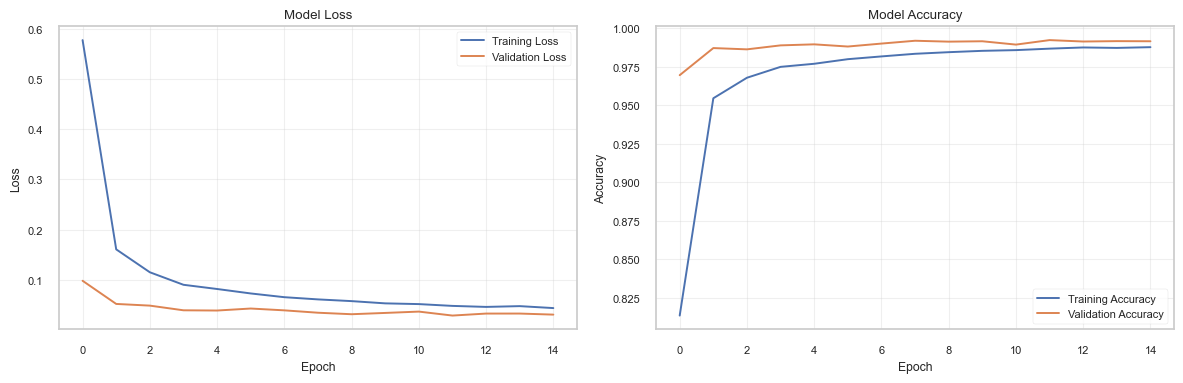

In [5]:
# ======================================================================
#                       MNIST Model Implementation
# ======================================================================


@track_memory
def load_and_preprocess_data():
    """
    Load and preprocess MNIST dataset with configured preprocessing steps.
    Returns preprocessed training, validation and test sets.
    """
    logger.info("Loading and preprocessing data...")
    try:
        # Load data
        (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
        
        # Apply configured normalization
        if DATA_CONFIG['preprocessing']['normalization'] == 'standardization':
            x_train = (x_train - np.mean(x_train)) / np.std(x_train)
            x_test = (x_test - np.mean(x_test)) / np.std(x_test)
        else:  # minmax normalization
            x_train = x_train.astype("float32") / 255
            x_test = x_test.astype("float32") / 255
        
        # Reshape to match input shape
        x_train = np.expand_dims(x_train, -1)
        x_test = np.expand_dims(x_test, -1)
        
        # Convert labels to categorical
        y_train = keras.utils.to_categorical(y_train, DATA_CONFIG['num_classes'])
        y_test = keras.utils.to_categorical(y_test, DATA_CONFIG['num_classes'])
        
        # Split training data into train and validation
        if TRAIN_CONFIG['validation']['enabled']:
            val_size = int(len(x_train) * TRAIN_CONFIG['validation']['split'])
            x_val = x_train[-val_size:]
            y_val = y_train[-val_size:]
            x_train = x_train[:-val_size]
            y_train = y_train[:-val_size]
            
            # Create validation dataset
            val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
            val_dataset = val_dataset.batch(DATA_CONFIG['data_loading']['batch_size'])
        else:
            val_dataset = None
        
        # Create training dataset
        train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
        train_dataset = train_dataset.cache() if DATA_CONFIG['data_loading']['cache'] else train_dataset
        train_dataset = train_dataset.shuffle(DATA_CONFIG['data_loading']['shuffle_buffer'])
        train_dataset = train_dataset.batch(DATA_CONFIG['data_loading']['batch_size'])
        train_dataset = train_dataset.prefetch(DATA_CONFIG['data_loading']['prefetch_buffer'])
        
        # Create test dataset
        test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
        test_dataset = test_dataset.batch(DATA_CONFIG['data_loading']['batch_size'])
        
        logger.info(f"Training samples: {x_train.shape[0]}")
        if val_dataset:
            logger.info(f"Validation samples: {x_val.shape[0]}")
        logger.info(f"Test samples: {x_test.shape[0]}")
        
        return train_dataset, val_dataset, test_dataset, (x_test, y_test)
    
    except Exception as e:
        logger.error(f"Error in data preprocessing: {str(e)}")
        raise

def create_data_augmentation():
    """Create data augmentation layer based on configuration."""
    return keras.Sequential([
        layers.RandomRotation(AUGMENT_CONFIG['rotation_range']/360),
        layers.RandomTranslation(
            AUGMENT_CONFIG['height_shift_range'],
            AUGMENT_CONFIG['width_shift_range']
        ),
        layers.RandomZoom(AUGMENT_CONFIG['zoom_range'])
    ]) if DATA_CONFIG['preprocessing']['augmentation'] else None

@track_memory
def build_model():
    """Create and compile model based on configuration."""
    logger.info("Building model...")
    try:
        # Create model inputs
        inputs = keras.Input(shape=DATA_CONFIG['input_shape'])
        
        # Add data augmentation if configured
        augmentation = create_data_augmentation()
        x = augmentation(inputs) if augmentation else inputs
        
        # Add convolutional layers
        for filters in MODEL_CONFIG['conv_layers']:
            x = layers.Conv2D(
                filters,
                MODEL_CONFIG['kernel_size'],
                activation=MODEL_CONFIG['activation'],
                padding='same'
            )(x)
            x = layers.MaxPooling2D(MODEL_CONFIG['pool_size'])(x)
        
        # Flatten and dense layers
        x = layers.Flatten()(x)
        
        # Add dense layers
        for units in MODEL_CONFIG['dense_layers']:
            x = layers.Dense(units, activation=MODEL_CONFIG['activation'])(x)
            x = layers.Dropout(MODEL_CONFIG['dropout_rate'])(x)
        
        # Output layer
        outputs = layers.Dense(
            DATA_CONFIG['num_classes'],
            activation=MODEL_CONFIG['final_activation']
        )(x)
        
        # Create model
        model = keras.Model(inputs, outputs)
        
        # Compile model
        optimizer = keras.optimizers.get(TRAIN_CONFIG['optimizer'])
        optimizer.learning_rate = TRAIN_CONFIG['learning_rate']
        
        model.compile(
            optimizer=optimizer,
            loss=TRAIN_CONFIG['loss'],
            metrics=TRAIN_CONFIG['metrics']
        )
        
        model.summary()
        return model
    
    except Exception as e:
        logger.error(f"Error in model building: {str(e)}")
        raise

        
def setup_callbacks():
    """Create training callbacks based on configuration."""
    callbacks = []
    
    # Early Stopping
    callbacks.append(keras.callbacks.EarlyStopping(
        **CALLBACK_CONFIG['early_stopping']
    ))
    
    # Learning Rate Reduction
    callbacks.append(keras.callbacks.ReduceLROnPlateau(
        **CALLBACK_CONFIG['reduce_lr']
    ))
    
    # Model Checkpoint
    callbacks.append(keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(PATH_CONFIG['model_dir'], 'best_model.keras'),
        **CALLBACK_CONFIG['model_checkpoint']
    ))
    
    # TensorBoard
    if EXPERIMENT_CONFIG['tensorboard']:
        callbacks.append(keras.callbacks.TensorBoard(
            log_dir=PATH_CONFIG['log_dir'],
            histogram_freq=1
        ))
    
    return callbacks



@track_memory
def train_model(model, train_dataset, val_dataset=None):
    """Train the model with all configured settings.
    
    Args:
        model: The compiled Keras model
        train_dataset: Training dataset
        val_dataset: Optional validation dataset
    """
    logger.info("Starting model training...")
    try:
        # Setup callbacks
        callbacks = setup_callbacks()
        
        # Enable mixed precision if configured
        if DEVICE_CONFIG['mixed_precision']:
            tf.keras.mixed_precision.set_global_policy('mixed_float16')
        
        # Set up training parameters
        train_params = {
            'epochs': TRAIN_CONFIG['epochs'],
            'callbacks': callbacks,
            'verbose': LOG_CONFIG['verbose']
        }
        
        # Add validation if available
        if val_dataset is not None:
            train_params['validation_data'] = val_dataset
            train_params['validation_freq'] = TRAIN_CONFIG['validation']['frequency']
        
        # Train model
        history = model.fit(
            train_dataset,
            **train_params
        )
        
        return history
    
    except Exception as e:
        logger.error(f"Error in model training: {str(e)}")
        raise
        
def evaluate_model(model, test_dataset, x_test, y_test):
    """Comprehensive model evaluation based on configuration."""
    logger.info("Evaluating model...")
    try:
        # Basic evaluation
        metrics = model.evaluate(test_dataset, verbose=0)
        results = dict(zip(model.metrics_names, metrics))
        
        # Additional metrics if configured
        if 'confusion_matrix' in VALIDATION_CONFIG['metrics']:
            y_pred = model.predict(x_test)
            cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
            results['confusion_matrix'] = cm
        
        if 'roc_auc' in VALIDATION_CONFIG['metrics']:
            y_pred_proba = model.predict(x_test)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
            results['roc_auc'] = roc_auc
        
        # Log results
        for metric, value in results.items():
            if isinstance(value, (int, float)):
                logger.info(f"{metric}: {value:.4f}")
        
        return results
    
    except Exception as e:
        logger.error(f"Error in model evaluation: {str(e)}")
        raise


def export_model(model, results):
    """Export model in configured formats with metadata."""
    logger.info("Exporting model...")
    try:
        # Export model in different formats
        for format in EXPORT_CONFIG['save_format']:
            if format == 'keras':
                filepath = os.path.join(PATH_CONFIG['model_dir'], 'model.keras')
                model.save(filepath)
                logger.info(f"Model saved in Keras format: {filepath}")
            
            elif format == 'savedmodel':
                filepath = os.path.join(PATH_CONFIG['model_dir'], 'saved_model')
                model.export(filepath)
                logger.info(f"Model exported in SavedModel format: {filepath}")
                
            elif format == 'tflite':
                try:
                    saved_model_path = os.path.join(PATH_CONFIG['model_dir'], 'temp_saved_model')
                    model.export(saved_model_path)
                    
                    converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
                    
                    if EXPORT_CONFIG['quantization']:
                        converter.optimizations = [tf.lite.Optimize.DEFAULT]
                        converter.target_spec.supported_types = [tf.float16]
                    
                    converter.target_spec.supported_ops = [
                        tf.lite.OpsSet.TFLITE_BUILTINS,
                        tf.lite.OpsSet.SELECT_TF_OPS
                    ]
                    
                    tflite_model = converter.convert()
                    
                    filepath = os.path.join(PATH_CONFIG['model_dir'], 'model.tflite')
                    with open(filepath, 'wb') as f:
                        f.write(tflite_model)
                    
                    logger.info(f"Model saved in TFLite format: {filepath}")
                    
                    import shutil
                    shutil.rmtree(saved_model_path, ignore_errors=True)
                    
                except Exception as e:
                    logger.error(f"TFLite conversion failed: {str(e)}")
                    logger.warning("Skipping TFLite format, continuing with other formats")
        
        # Convert results to JSON serializable format
        serializable_results = {}
        for key, value in results.items():
            if isinstance(value, np.ndarray):
                serializable_results[key] = value.tolist()
            elif isinstance(value, np.floating):
                serializable_results[key] = float(value)
            elif isinstance(value, np.integer):
                serializable_results[key] = int(value)
            else:
                serializable_results[key] = value
        
        # Save metadata
        metadata = EXPORT_CONFIG['metadata'].copy()
        metadata.update({
            'performance': serializable_results,
            'config': {
                'model': MODEL_CONFIG,
                'training': TRAIN_CONFIG
            },
            'export_info': {
                'formats': EXPORT_CONFIG['save_format'],
                'quantization_enabled': EXPORT_CONFIG['quantization'],
                'optimization_enabled': EXPORT_CONFIG['optimization'],
                'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            }
        })
        
        metadata_path = os.path.join(PATH_CONFIG['model_dir'], 'metadata.json')
        with open(metadata_path, 'w') as f:
            json.dump(metadata, f, indent=4)
        
        logger.info(f"Model metadata saved: {metadata_path}")
            
    except Exception as e:
        logger.error(f"Error in model export: {str(e)}")
        raise
                    
        
def plot_training_history(history):
    """
    Plot training history with configured visualization settings.
    
    Args:
        history: Training history from model.fit()
    """
    logger.info("Plotting training history...")
    try:
        # Set style according to configuration
        plt.style.use(VISUALIZATION_CONFIG['style'])
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Plot training loss
        ax1.plot(history.history['loss'], label='Training Loss')
        # Plot validation loss if it exists
        if 'val_loss' in history.history:
            ax1.plot(history.history['val_loss'], label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend(loc='upper right')
        ax1.grid(True, alpha=0.3)
        
        # Plot training accuracy
        ax2.plot(history.history['accuracy'], label='Training Accuracy')
        # Plot validation accuracy if it exists
        if 'val_accuracy' in history.history:
            ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend(loc='lower right')
        ax2.grid(True, alpha=0.3)
        
        # Adjust layout and save
        plt.tight_layout()
        
        # Save plot if configured
        if 'training_history' in VISUALIZATION_CONFIG['plots']:
            for format in VISUALIZATION_CONFIG['save_format']:
                fig.savefig(
                    os.path.join(PATH_CONFIG['fig_dir'], f'training_history.{format}'),
                    dpi=VISUALIZATION_CONFIG['dpi'],
                    bbox_inches='tight'
                )
        
        plt.show()
        
    except Exception as e:
        logger.error(f"Error in plotting training history: {str(e)}")
        raise


def main():
    """Main execution function."""
    try:
        # Set random seeds
        tf.random.set_seed(RANDOM_SEED)
        np.random.seed(RANDOM_SEED)
        
        # Load and preprocess data
        train_dataset, val_dataset, test_dataset, test_data = load_and_preprocess_data()
        
        # Build model
        model = build_model()
        
        # Train model
        history = train_model(model, train_dataset, val_dataset)
        
        # Evaluate model
        results = evaluate_model(model, test_dataset, *test_data)
        
        # Export model
        if EXPERIMENT_CONFIG['save_artifacts']:
            export_model(model, results)
        
        # Plot results
        if VISUALIZATION_CONFIG['plots']['training_history']:
            plot_training_history(history)
            
    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()